In [1]:
import cv2, os,random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import keras
from keras import backend as K

Using TensorFlow backend.


### Generating the train data
This part is to generate the data and the labels for use.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
train_dir='./input/train/'
test_dir='./input/test/'
model = VGG16(weights='imagenet', include_top=False)

train_file=[train_dir+img for img in os.listdir(train_dir)]
number=range(0,12500)
random.shuffle(number)
number=number[0:2000]
train=[]
cat_label=[0]
dog_label=[1]
for i in tqdm(number):
    cat_path=train_dir+'cat.'+str(i)+'.jpg'
    img = image.load_img(cat_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    cat_data = preprocess_input(x)
    cat_data=model.predict(cat_data)

   
    dog_path=train_dir+'dog.'+str(i)+'.jpg'
    img = image.load_img(dog_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    dog_data = preprocess_input(x)
    dog_data=model.predict(dog_data)
   
    train.append([np.array(cat_data[0]),np.array(cat_label)])
    train.append([np.array(dog_data[0]),np.array(dog_label)])
np.save('train_4000.npy',train)

### Build and Train the Model
This part is to build and train the model

In [11]:
train_data = np.array([i[0] for i in train])
train_label = np.array([i[1] for i in train]) 
del train


from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.optimizers import SGD
sgd= SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
objective = 'binary_crossentropy'
def top():
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:],name='flatten'))
    model.add(Dense(512, activation='relu', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', name='fc2'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid', name='predictions'))

    model.compile(loss=objective, optimizer=sgd, metrics=['accuracy'])
    return model


model = top()

batch_size=64
nb_epoch=30
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        


history = LossHistory()
model.fit(train_data, train_label, batch_size=batch_size, nb_epoch=nb_epoch,
          validation_split=0.25, verbose=1, shuffle=True, callbacks=[history])
model.save('model.h5')
del train_data

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 13s - loss: 2.7973 - acc: 0.8223 - val_loss: 0.7991 - val_acc: 0.9500
Epoch 2/30
3000/3000 [==============================] - 13s - loss: 3.1166 - acc: 0.8053 - val_loss: 0.7991 - val_acc: 0.9500
Epoch 3/30
3000/3000 [==============================] - 13s - loss: 3.0411 - acc: 0.8100 - val_loss: 0.7991 - val_acc: 0.9500
Epoch 4/30
3000/3000 [==============================] - 12s - loss: 2.9081 - acc: 0.8183 - val_loss: 0.7991 - val_acc: 0.9500
Epoch 5/30
3000/3000 [==============================] - 13s - loss: 2.7307 - acc: 0.8293 - val_loss: 0.7991 - val_acc: 0.9500
Epoch 6/30
1920/3000 [==================>...........] - ETA: 4s - loss: 3.0026 - acc: 0.8125

KeyboardInterrupt: 

### Generating the test data
This part is to build and generate the test data and label.

In [2]:
test=[]
number=range(1,12501)
testmodel = VGG16(weights='imagenet', include_top=False)
for i in tqdm(number):
    img_path=test_dir+''+str(i)+'.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    data=testmodel.predict(x)
    test.append([np.array(data[0]),np.array(i)])
np.save('test.npy',test)    



100%|██████████| 2000/2000 [1:02:04<00:00,  1.86s/it]


Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 12s - loss: 3.0892 - acc: 0.8063 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 2/30
3000/3000 [==============================] - 12s - loss: 3.3971 - acc: 0.7880 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 3/30
3000/3000 [==============================] - 12s - loss: 3.0489 - acc: 0.8097 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 4/30
3000/3000 [==============================] - 12s - loss: 3.2263 - acc: 0.7987 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 5/30
3000/3000 [==============================] - 12s - loss: 3.2365 - acc: 0.7980 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 6/30
3000/3000 [==============================] - 12s - loss: 3.1573 - acc: 0.8030 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 7/30
3000/3000 [==============================] - 12s - loss: 3.0880 - acc: 0.8073 - val_loss: 1.2178 - val_acc: 0.9240
Epoch 8/30
3000/3000 [==============================] - 12s - loss: 3.

100%|██████████| 2000/2000 [30:35<00:00,  1.10it/s]


### Predict the test data
This part use the trained model to predict data and save the result.

In [16]:

test_label=np.array([i[1] for i in test])
test_data = np.array([i[0] for i in test])

prediction=model.predict(test_data,verbose=1)
prediction=prediction.clip(min=0.005, max=0.995)


import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

for i in range(0,12500):


    index = int(test_label[i])
    df.set_value(index-1, 'label', prediction[i])

df.to_csv('pred.csv', index=None)

12480/12500 [============================>.] - ETA: 0s

### Draw the image
This part draw the image of loss's change when training

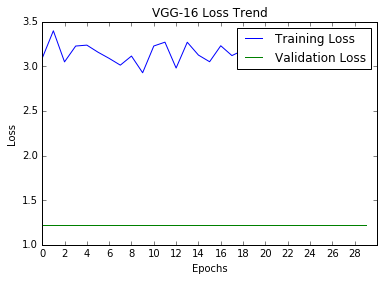

In [16]:
loss = history.losses
val_loss = history.val_losses
fig=plt.figure();
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()